# Ford GoBike System Data Exploration
## by Chunan Lin

## Preliminary Wrangling

> This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in 2017

In [226]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [465]:
# load in the dataset 
fordgo2017 = pd.read_csv("2017-fordgobike-tripdata.csv")
print(fordgo2017.shape)
print(fordgo2017.dtypes)
print(fordgo2017.head(5))

(519700, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object
   duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   

   start_station_id  

In [228]:
## drop the rows that have null Value
fordgo2017 = fordgo2017.dropna()
fordgo2017 = fordgo2017.reset_index(drop=True)

In [229]:
# convert member_birth_year datatype to integer
fordgo2017['member_birth_year'] = fordgo2017.member_birth_year.astype('int')

In [230]:
# calculate and create a new variable "distance" to contain distance by using latitude and longitude
from math import sin, cos, sqrt, atan2,radians
def calculate_distance(df):
    R = 6373.0

    lat1 = radians(df['start_station_latitude'])
    lon1 = radians(df['start_station_longitude'])
    lat2 = radians(df['end_station_latitude'])
    lon2 = radians(df['end_station_longitude'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c 
    return distance

fordgo2017 ['distance'] = fordgo2017.apply(calculate_distance,axis=1)


In [231]:
# create and calculate a new column "member_age" by using the year when the data was recorded and memeber_birth_year
fordgo2017['member_age'] = 2017 - fordgo2017['member_birth_year']

In [232]:
#convert member_gender and user_type to category datatype
fordgo2017['user_type'] = fordgo2017.user_type.astype('category')
fordgo2017['member_gender'] = fordgo2017.member_gender.astype('category')

In [233]:
#categorized and create a new variable "age_group" based on different ages
age_group_order = ['Under 18','18-35','36-55','Over 55']
def age_grouped(df):
    if df['member_age']>=0 and df['member_age']<=17:
        age_group = 'Under 18'
    if df['member_age']>=18 and df['member_age']<=35:
        age_group = '18-35'
    if df['member_age']>=36 and df['member_age']<=55:
        age_group = '36-55'
    if df['member_age']>55:
        age_group ='Over 55'
    return age_group

fordgo2017['age_group'] = fordgo2017.apply(age_grouped,axis=1)
fordgo2017['age_group'] = fordgo2017.age_group.astype('category',ordered=True, categories = age_group_order)

/Users/chunanlin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead


In [234]:
# check duplicated row
fordgo2017[fordgo2017.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,distance,member_age,age_group


In [235]:
fordgo2017.distance.unique()

array([0.94322716, 3.07069076, 0.63653914, ..., 6.4961736 , 0.46762906,
       3.74361352])

In [236]:
fordgo2017.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,distance,member_age
count,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000
mean,832.934014,95.046132,37.771968,-122.364093,91.854907,37.772090,-122.363274,1680.628285,1980.404787,1.599837,36.595213
std,2525.280717,84.578497,0.084914,0.104240,83.053529,0.084811,0.103723,972.828314,10.513488,0.983844,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000,0.000000,18.000000
25%,364.000000,25.000000,37.773492,-122.411726,24.000000,37.773793,-122.409851,795.000000,1974.000000,0.920679,29.000000
50%,556.000000,67.000000,37.782411,-122.398525,66.000000,37.782411,-122.397405,1739.000000,1983.000000,1.408404,34.000000
75%,838.000000,138.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2530.000000,1988.000000,2.073144,43.000000
max,86252.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000,62.313237,131.000000


## Structure
There are 45,3159 individual rides records with multiple features(duration_sec, start_time, end_time,start_station and end_station(id,name,longtitude,latitude), member(birth_year,gender,user_type)). Some main features such as distance and age are numeric. Other features such as member_gender, age_group and user_type are categorical. 

member_gender : Male, Female, Other <br>
user_type: Customer, Subscriber <br>
age_group(younger to older): Under 18, 18-35, 36-55, Over 55<br>

## Interest

My interests is focusing on what feature are the best for predicting the duration of a ride?

Categorical variables such as age_group, member_gender and user_type will help me to count and  calculate such as how many rides or average time in each age group or gender. My assumption is that younger group (mostly between 18 and 35) are the most common users for Ford GoBike System and has the least average duration and most distance in both male and female gender. The distance and age are main features to predict the duration of travel.

## Univariate Exploration

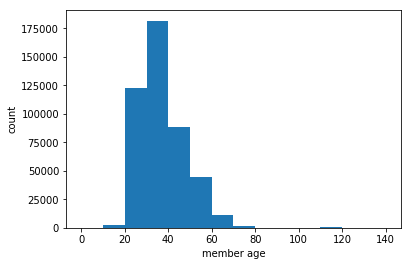

In [237]:
# standard-plot member age distribution 
bin_x = np.arange(0,fordgo2017.member_age.max()+10,10)
plt.hist(data=fordgo2017, x = 'member_age',bins=bin_x);
plt.xlabel('member age')
plt.ylabel('count');

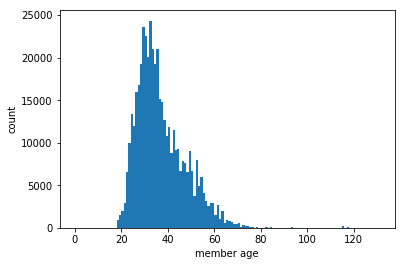

In [238]:
# plot member age in a smaller bin size to show more detail
bin_x = np.arange(0,fordgo2017.member_age.max()+1,1)
plt.hist(data=fordgo2017, x = 'member_age',bins=bin_x);
plt.xlabel('member age')
plt.ylabel('count');

#### Member Age
- As shown above, Member Age has a right-skewed and roughly unimodal distribution. The high peaks  are between age 20 and 40. Some small peeks also appear in between 100 and 120, which is unnormal. 

In [239]:
# observe data where birth year is over 100
fordgo2017[fordgo2017.member_age>=100].member_age.unique()

array([117, 115, 106, 110, 116, 131])

In [240]:
# remove data where member birth year is 1900
fordgo2017 = fordgo2017[fordgo2017.member_age<100]

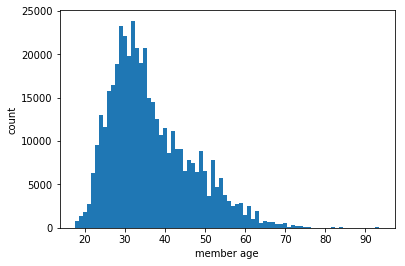

In [268]:
# re-plot the member age again
bin_x = np.arange(17.5,fordgo2017.member_age.max()+1,1)
plt.hist(data=fordgo2017, x = 'member_age',bins=bin_x);
plt.xlabel('member age')
plt.ylabel('count');

As shown above, this is the histogram of member age after removing data where age is over 100

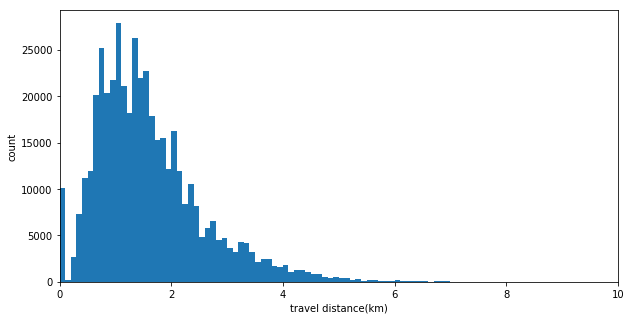

In [242]:
# plot travel distance
plt.figure(figsize=(10,5))
bin_x = np.arange(0,fordgo2017.distance.max()+0.1,0.1)
plt.hist(data=fordgo2017, x='distance',bins=bin_x)
plt.xlim(0,10)
plt.xlabel('travel distance(km)')
plt.ylabel('count');

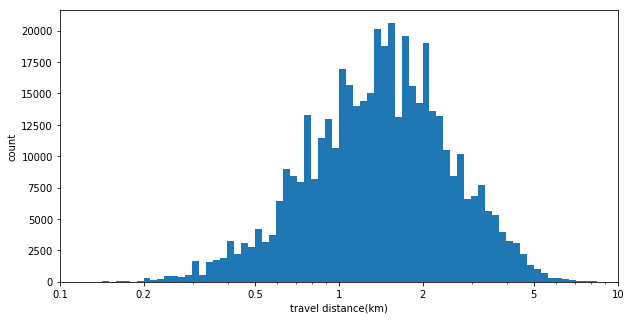

In [243]:
# plot travel distance in a smaller bin size and put a log scale on x axis
plt.figure(figsize=(10,5))
xticks=[0.1,0.2,0.5,1,2,5,10]
bin_x = 10**np.arange(-2,np.log10(fordgo2017.distance.max())+0.025,0.025)
plt.hist(data=fordgo2017, x='distance',bins=bin_x)
plt.xscale('log')
plt.xlim(0.5,10)
plt.xticks(xticks,xticks)
plt.xlabel('travel distance(km)')
plt.ylabel('count');

#### Travel Distance
- As shown above, without putting a log scale on the x axis, the distance(km) has a right-skewed, roughly unimodall and ong-tailed distribution with roughly 10000 records of 0km travel distance. After putting a log scale on the x axis, the distance(km) has a better unimodal distribution. The most frequent travel distance is between 1km and 2km

In [244]:
# observe data where travel distance is 0
(fordgo2017.distance ==0).sum()

10116

In [245]:
# remove data where travel distance is 0
fordgo2017 = fordgo2017[fordgo2017.distance !=0]

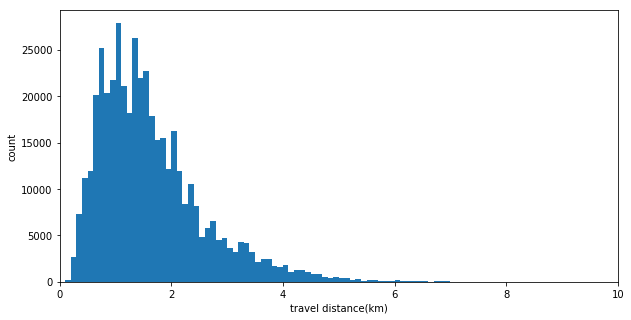

In [247]:
# re-plot travel distance again without a log scale
plt.figure(figsize=(10,5))
bin_x = np.arange(0,fordgo2017.distance.max()+0.1,0.1)
plt.hist(data=fordgo2017, x='distance',bins=bin_x)
plt.xlim(0,10)
plt.xlabel('travel distance(km)')
plt.ylabel('count');

As shown above, this is the histogram of travel distance after removing data where there is invalid travel distance 0.

(0, 20000)

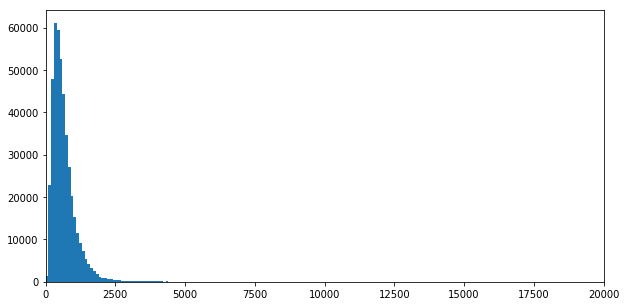

In [248]:
# standard-plot duration
bin_x = np.arange(0,fordgo2017.duration_sec.max()+100,100)
plt.figure(figsize=(10,5))
plt.hist(data=fordgo2017, x='duration_sec',bins=bin_x)
plt.xlim(0,20000)

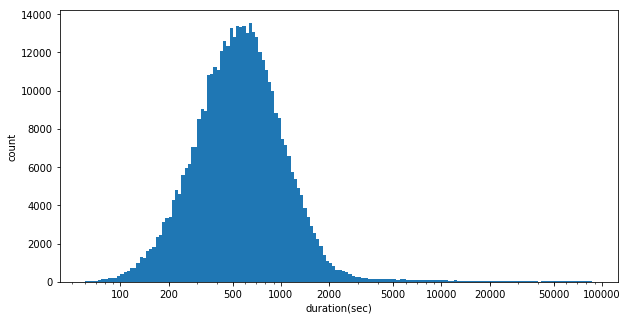

In [249]:
# plot duration(sec) with a log scale on x axis
xticks = [100,200,500,1000,2000,5000,10000,20000,50000,100000]
bin_x = 10**np.arange(1.78,np.log10(fordgo2017.duration_sec.max())+0.02,0.02)
plt.figure(figsize=(10,5))
plt.hist(data=fordgo2017, x='duration_sec',bins=bin_x);
plt.xscale('log')
plt.xticks(xticks,xticks)
plt.xlabel('duration(sec)')
plt.ylabel('count');

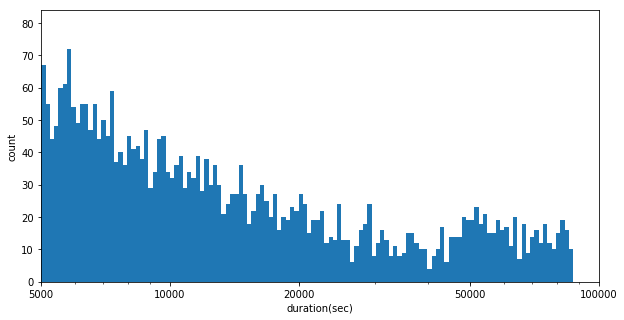

In [250]:
# observe the distribution on the right long tail (5000,100000)as shown above
xticks = [5000,10000,20000,50000,100000]
bin_x = 10**np.arange(3.6,np.log10(fordgo2017.duration_sec.max())+0.01,0.01)
plt.figure(figsize=(10,5))
plt.hist(data=fordgo2017, x='duration_sec',bins=bin_x);
plt.xscale('log')
plt.xticks(xticks,xticks)
plt.xlabel('duration(sec)')
plt.ylabel('count')
plt.xlim(5000,100000);

#### Travel Duration
- As shown above, putting a log scale on the x axis, the Travel Duration is roughly unimodal and has a long tail between 5000 and 100000. Observing further on the long tail range of data, the frequency of duration is generally decreasing along the increasing duration value. It stops between 80000 seconds and 90000 seconds, which is nearly between 22 hours and 25 hours.

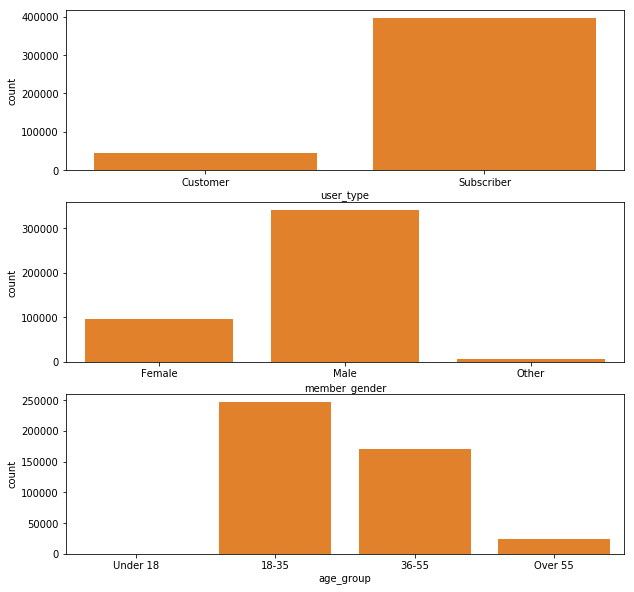

In [251]:
fig, ax = plt.subplots(nrows=3,figsize=[10,10])
base_color = sb.color_palette()[1]
sb.countplot(data=fordgo2017, x='user_type',color=base_color,ax=ax[0])
sb.countplot(data=fordgo2017, x='member_gender',color=base_color,ax=ax[1])
sb.countplot(data=fordgo2017, x='age_group',color=base_color,ax=ax[2])

#### User Type
- The subscriber-type users hold a large proportion of the count of users

#### Member Gender
- The Male users hold a large proportion of the count of users.

#### Age Group
- There is no user in age group "Under 18"
- Besides "Under 18" age group, there is a decreasing trend of user counts as it comes to an elder age group 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [253]:
## After adjusting the data, reset index
fordgo2017 = fordgo2017.reset_index(drop=True)


- `Travel Duration` took on a large scale of value. So I used log transformation on the x scale. After transformation, the distribution becomes unimodal and normally distributed,except for a long tail between 5000 and 100000 seconds.


- `Member age` has an unnormal range of age between 100 and 120. The reason may be that when users filled in their personal information, they accidentally fill thier birth year by default(1900) or choose other birth year by mistake. I decided to remove the data where the age is over 100 since the age range is far beyond the `age_group` I created.

- `Travel distance` has invalid value in over 10000 data rows. The reason may be that users may start the trip by accident without continuing or suddenly decide not to ride when it started. I decided to remove the data since it will be invalid in the visualization.

- `duration_sec` has an unusual range as shown in the histogram above, the end value shows someone is biking for between 22 hours and 25 hours. The reason may be that some users are borrowing the bikes overnight. However, it is safe to keep the data since the duration won't influence other variables and the distance is calculated by using latitude and longitude.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [274]:
fordgo2017.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,distance,member_age
count,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000
mean,794.380074,94.362324,37.772276,-122.365149,91.095918,37.772401,-122.364310,1682.847287,1980.493936,1.636589,36.506064
std,2371.837352,84.246874,0.083643,0.102952,82.648479,0.083535,0.102425,973.198361,10.204339,0.964668,10.204339
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,11.000000,1924.000000,0.013291,18.000000
25%,364.000000,25.000000,37.773492,-122.411726,24.000000,37.774520,-122.409851,796.000000,1974.000000,0.947197,29.000000
50%,552.000000,67.000000,37.782411,-122.398525,66.000000,37.782411,-122.398436,1743.000000,1983.000000,1.421105,34.000000
75%,826.000000,134.000000,37.795001,-122.391034,133.000000,37.795392,-122.391034,2533.000000,1988.000000,2.087074,43.000000
max,86252.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000,62.313237,93.000000


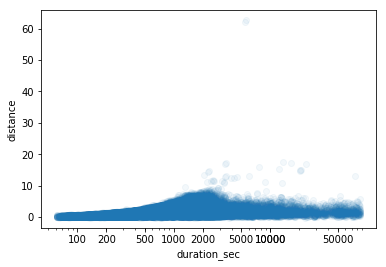

In [281]:
# plot scatterplot between distance and duration, with log transformation on duration_sec
xticks = [100,200,500,1000,2000,5000,10000,50000,10000]
sb.regplot(data=fordgo2017, x='duration_sec',y='distance',scatter_kws={'alpha' :1/20},fit_reg=False ,y_jitter=0.3)
plt.xscale('log')
plt.xticks(xticks,xticks);

As mentioned in the last section, the range between 5000 and 100000 seconds is unnormal for daily riding. I zoom in the area that the duration is between 60 and 5000 seconds

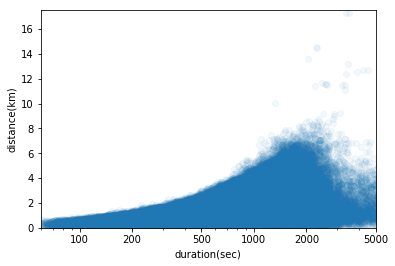

In [357]:
# zoom in the range between 60 and 5000
xticks = [100,200,500,1000,2000,5000,10000,50000,10000]
sb.regplot(data=fordgo2017, x='duration_sec',y='distance',scatter_kws={'alpha' :1/20},fit_reg=False ,y_jitter=0.3)
plt.xscale('log')
plt.xticks(xticks,xticks);
plt.xlim(60,5000)
plt.ylim(0,17.5)
plt.xlabel('duration(sec)')
plt.ylabel('distance(km)');

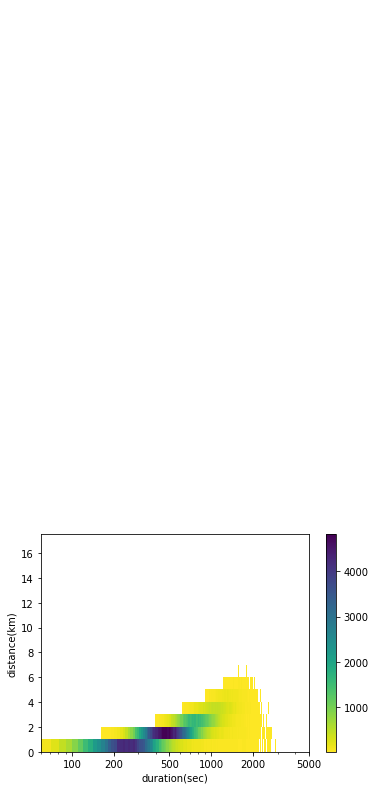

In [305]:
# plot heatmap betwee
xticks = [100,200,500,1000,2000,5000,10000,50000,10000]
bin_x = np.arange(60,5000+10,10)
bin_y = np.arange(0,60+1,1)
plt.hist2d(data=fordgo2017, x='duration_sec',y='distance',bins=[bin_x,bin_y],cmin=10,cmap='viridis_r')
plt.xscale('log')
plt.xticks(xticks,xticks)
plt.xlim(60,5000)
plt.ylim(0,17.5)
plt.xlabel('duration(sec)')
plt.ylabel('distance(km)')
plt.colorbar();

#### Duration vs Distance
- As shown in the scatter plot and heatmap above, the data suggests that there are multiple linear trend between duration and distance. The trend ends at between 1000 and 2000 seconds duration.

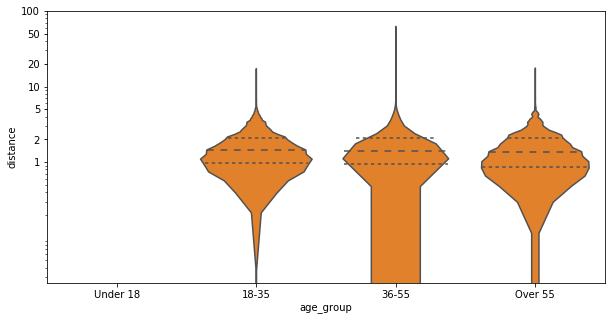

In [350]:
# plot violin plot between age_group and distance
yticks =[1,2,5,10,20,50,100]
plt.figure(figsize=(10,5))
sb.violinplot(data=fordgo2017,x='age_group',y='distance',inner='quartile',color=base_color)
plt.yscale('log')
plt.yticks(yticks,yticks);


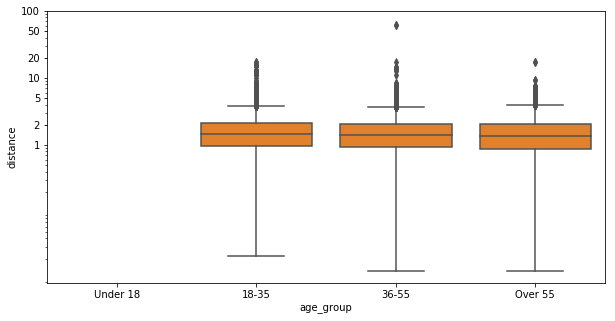

In [351]:
# plot box plot between age_group and distance
yticks =[1,2,5,10,20,50,100]
plt.figure(figsize=(10,5))
sb.boxplot(data=fordgo2017,x='age_group',y='distance',color=base_color)
plt.yscale('log')
plt.yticks(yticks,yticks);

#### age_group vs distance
- No obious relationship
- As shown in the violin plot, each age group has familar pattern that their most frequent travel distance are all around 1 km. The age group between 36 and 55 has the most low travel distance (below 1 km) .
- Interestingly, even though most of users in age between 36 and 55 have travel distance lower than 1km, the longest travel distance is also in the age group "36-55" as seen in the outliners.

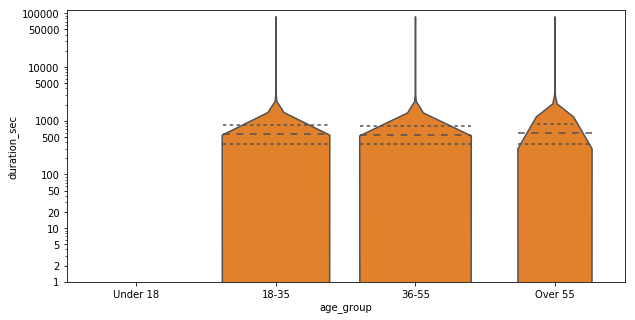

In [348]:
# plot violin plot between age_group and duration
yticks =[1,2,5,10,20,50,100,500,1000,5000,10000,50000,100000]
plt.figure(figsize=(10,5))
sb.violinplot(data=fordgo2017,x='age_group',y='duration_sec',inner='quartile',color=base_color)
plt.yscale('log')
plt.yticks(yticks,yticks);

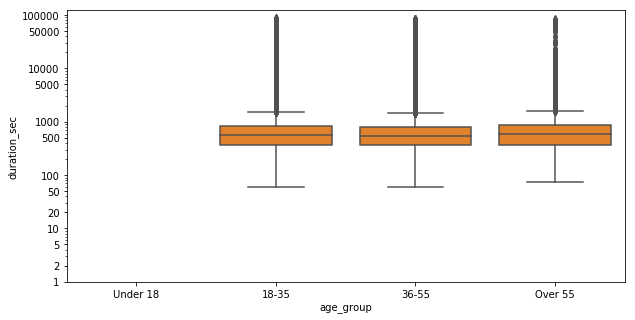

In [352]:
# plot box plot between age_group and duration
yticks =[1,2,5,10,20,50,100,500,1000,5000,10000,50000,100000]
plt.figure(figsize=(10,5))
sb.boxplot(data=fordgo2017,x='age_group',y='duration_sec',color=base_color)
plt.yscale('log')
plt.yticks(yticks,yticks);

#### age_group vs duration
- No obvious relationship

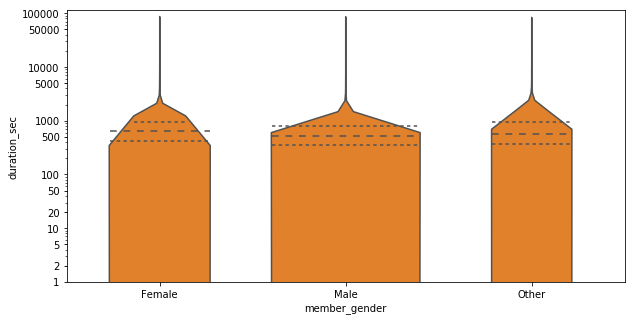

In [347]:
# plot violin plot between gender and duration
yticks =[1,2,5,10,20,50,100,500,1000,5000,10000,50000,100000]
plt.figure(figsize=(10,5))
sb.violinplot(data=fordgo2017,x='member_gender',y='duration_sec',inner='quartile',color=base_color)
plt.yscale('log')
plt.yticks(yticks,yticks);

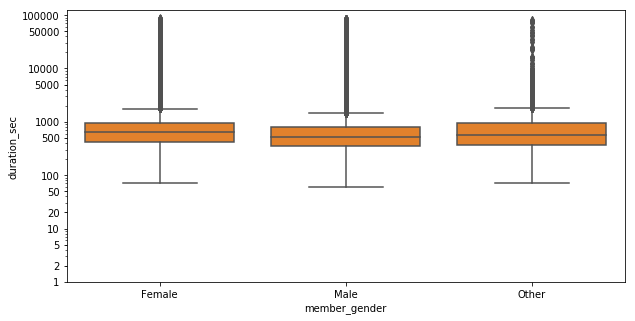

In [346]:
# plot box plot between gender and duration
yticks =[1,2,5,10,20,50,100,500,1000,5000,10000,50000,100000]
plt.figure(figsize=(10,5))
sb.boxplot(data=fordgo2017,x='member_gender',y='duration_sec',color=base_color)
plt.yscale('log')
plt.yticks(yticks,yticks);

#### gender vs duration
- No obvious relationship
- As shown in the violin plot, the male has a boarder plot since the male users hold a large proportion of the count of users.
- As shown in the box plot, Both female and other have a larger median duration value than male users.

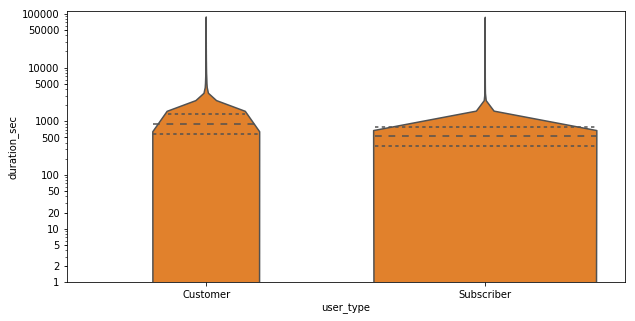

In [344]:
# plot violin plot between user type and duration
yticks =[1,2,5,10,20,50,100,500,1000,5000,10000,50000,100000]
plt.figure(figsize=(10,5))
sb.violinplot(data=fordgo2017,x='user_type',y='duration_sec',inner='quartile',color=base_color)
plt.yscale('log')
plt.yticks(yticks,yticks);

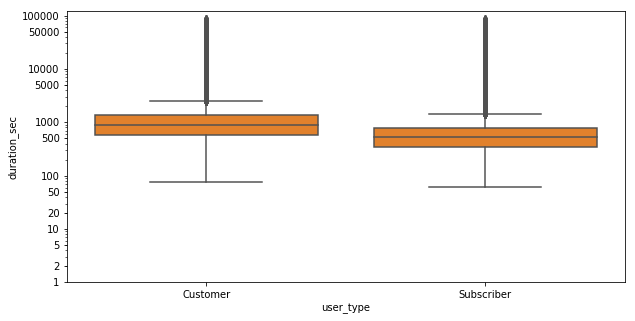

In [345]:
# plot box plot between user type and duration
yticks =[1,2,5,10,20,50,100,500,1000,5000,10000,50000,100000]
plt.figure(figsize=(10,5))
sb.boxplot(data=fordgo2017,x='user_type',y='duration_sec',color=base_color)
plt.yscale('log')
plt.yticks(yticks,yticks);

#### user type vs duration
- As shown in the violin plot, the subscriber-user type has a boarder width since there are way more subscribers than customer in the dataset.
- As shome in the box plot, the customer has a greater median duration value than subscriber-user type.

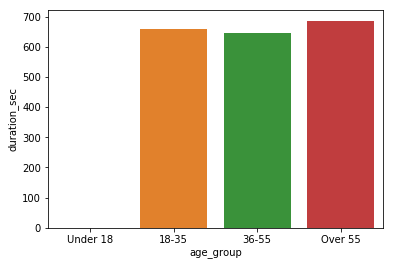

In [420]:
# bar plot average duration in each age group 
# First only use the data that have linear relationship (duration>60 and duration <5000) 
fordgo2017_linear = fordgo2017[fordgo2017.duration_sec <5000]

#Then group them by age group
mean = fordgo2017_linear.groupby('age_group').mean()
sb.barplot(data = mean,x=mean.index,y='duration_sec')

#### average duration vs age group
- One interesting thing is the age group between 36 and 55 has the least average duration

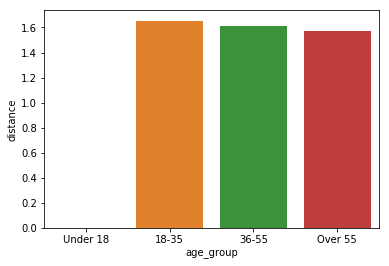

In [416]:
# bar plot average distance in each age group
mean = fordgo2017_linear.groupby('age_group').mean()
sb.barplot(data = mean,x=mean.index,y='distance')

#### average distance vs age group
- younger age group has the most average distance comparing to the other age groups. 

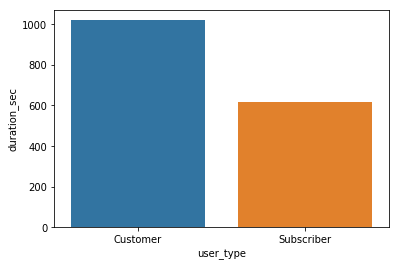

In [418]:
#  bar plot average duration in each user type 
mean = fordgo2017_linear.groupby('user_type').mean()
sb.barplot(data = mean,x=mean.index,y='duration_sec');

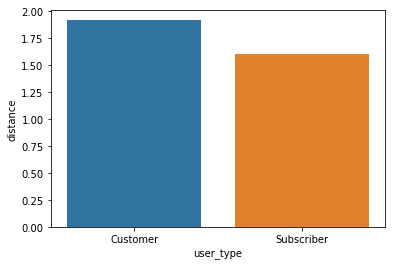

In [419]:
# bar plot average distance in each user type
mean = fordgo2017_linear.groupby('user_type').mean()
sb.barplot(data = mean,x=mean.index,y='distance');

#### average distance vs user type &  average duration vs user type
- Customer-users has longer average duration and average distance than subscriber-users 


According to the heatmap and scatter plot between duration and distance, we can see multiple linear relationships in duration between 60 and 5000 seconds. In the multivariate exploration, I will compare this relationship with a third variable.

The middle age group has the least average duration which is against my assumption. Even though, the customer-user has way more less number than subscriber, thier average duration and average distance are larger than subscriber-user

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

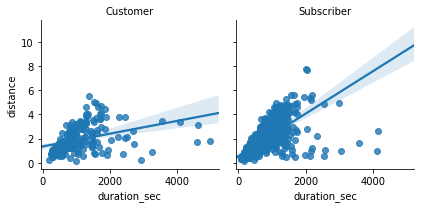

In [450]:

# compare distance, duration and user type
# create a sample to avoid overlapping 

sample = fordgo2017_linear.sample(2000)
g = sb.FacetGrid(data=sample, col='user_type')
g.map(sb.regplot,'duration_sec','distance')
g.set_titles('{col_name}');

As showm above, the user type may be one of the factors that influence the trend between duration and distance

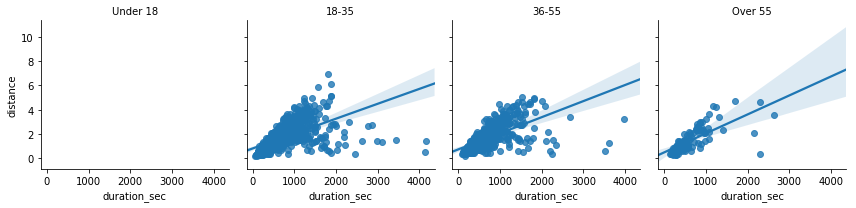

In [455]:
# compare distance, duration and age group
# create a sample to avoid overlapping 

sample = fordgo2017_linear.sample(2000)
g = sb.FacetGrid(data=sample, col='age_group')
g.map(sb.regplot,'duration_sec','distance')
g.set_titles('{col_name}');

As shown above the age group doesn't influence the trend between distance and duration.

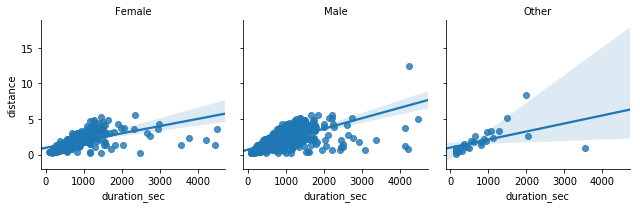

In [463]:
# compare distance, duration and age group
# create a sample to avoid overlapping 

sample = fordgo2017_linear.sample(2000)
g = sb.FacetGrid(data=sample, col='member_gender')
g.map(sb.regplot,'duration_sec','distance')
g.set_titles('{col_name}');

As shown above in each gender group, the relationship between duration and distance are similar.

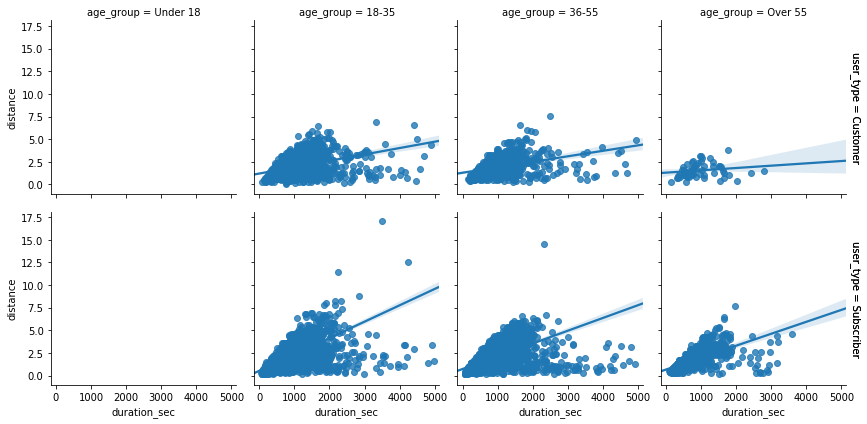

In [464]:
# compare distance, duration, age_group, and user type
sample = fordgo2017_linear.sample(25000)
g = sb.FacetGrid(data=sample, col='age_group',row='user_type',margin_titles =True)
g.map(sb.regplot,'duration_sec','distance')
g.set_titles('{col_name}');

As shown in the last figure, the trend between distance and duration will change based on user type.